In [53]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = 'intensity_data.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='CE_PIM_Pd8wt_LIG')

# Display the DataFrame
df

,Raman shift,Intensity
0,3200.17,-0.110966
1,3199.38,-0.104012
2,3198.59,-0.124296
3,3197.80,-0.150435
4,3197.00,-0.138989
...,...,...
2250,1104.53,-0.030521
2251,1103.44,-0.009612
2252,1102.35,-0.010995
2253,1101.26,-0.016587


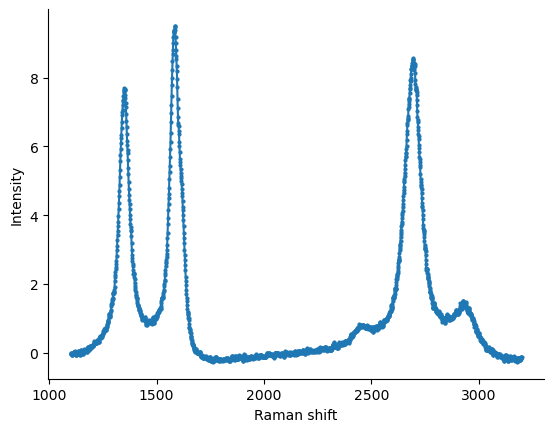

In [55]:
import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are your column names
x = df['Raman shift']
y = df['Intensity']

fig, ax = plt.subplots()

# Plotting the data with points and a line connecting them
plt.plot(x, y, marker='o', markersize=2, linestyle='-')
plt.xlabel('Raman shift')  # Replace with appropriate label
plt.ylabel('Intensity')  # Replace with appropriate label

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

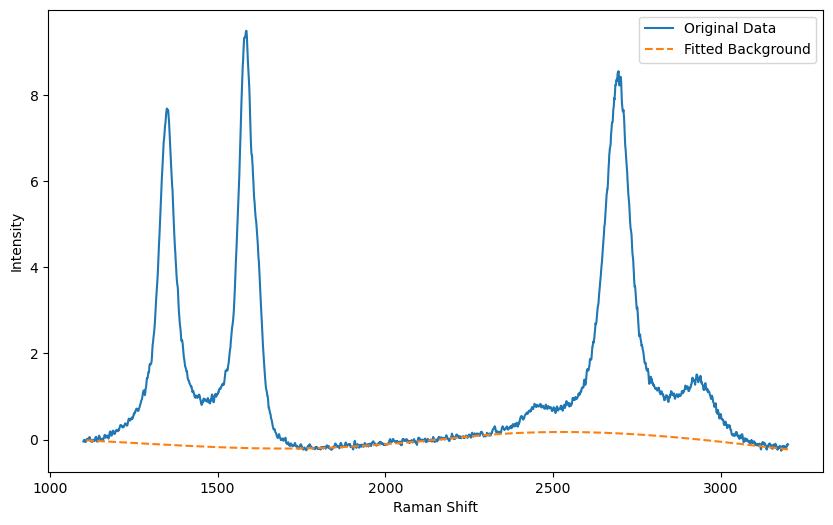

In [111]:
from pybaselines import Baseline

# Create a Baseline object
baseline_fitter = Baseline()

# Apply the IARPLS baseline correction
background, params = baseline_fitter.iarpls(y, lam= 1e7, diff_order=2)  # Adjust parameters as needed

# Plot original data, background, and corrected data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data')
plt.plot(x, background, label='Fitted Background', linestyle='--')
plt.xlabel('Raman Shift')
plt.ylabel('Intensity')
plt.legend()
plt.show()

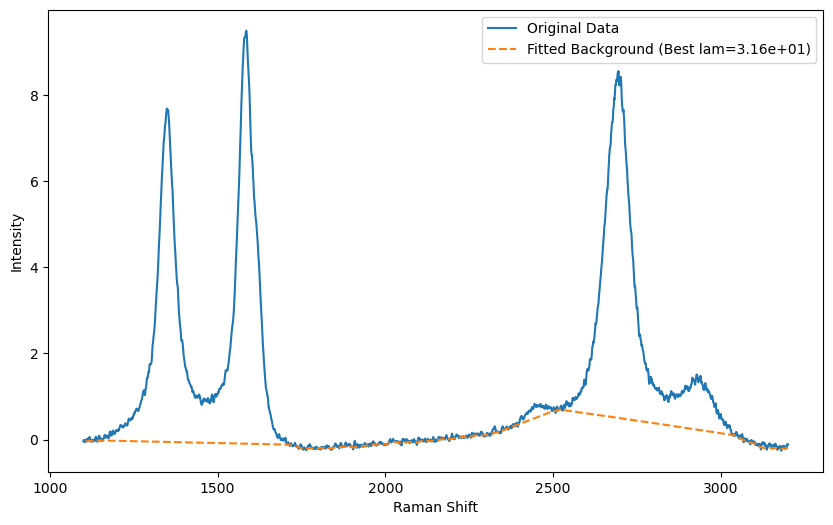

Optimal value of lam found: 3.16e+01


In [75]:
from pybaselines import Baseline
from skopt import gp_minimize
from skopt.space import Real
import warnings

# Initialize the Baseline object
baseline_fitter = Baseline()

# Define the objective function to minimize, with a small noise component
def objective(lam):
    lam = 10**lam[0]  # Convert from log scale for optimization
    background, _ = baseline_fitter.iarpls(y, lam=lam, diff_order=1)
    residual = y - background
    error = np.sum(residual**2) + np.random.normal(0, 1e-5)  # Small noise added
    return error

# Define the search space for lam in log10 scale with slightly expanded boundaries
search_space = [Real(1.5, 7.5, name="log_lam")]  # Expanded range

# Suppress specific warning types
warnings.filterwarnings("ignore", category=UserWarning, module="skopt")

# Run Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=30, random_state=0)

# Extract the optimal lam value (convert back from log scale)
best_log_lam = result.x[0]
best_lam = 10**best_log_lam

# Fit the best background with the optimal lam
best_background, _ = baseline_fitter.iarpls(y, lam=best_lam, diff_order=1)

# Plot original data, background, and corrected data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Data')
plt.plot(x, best_background, label=f'Fitted Background (Best lam={best_lam:.2e})', linestyle='--')
plt.xlabel('Raman Shift')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(f"Optimal value of lam found: {best_lam:.2e}")

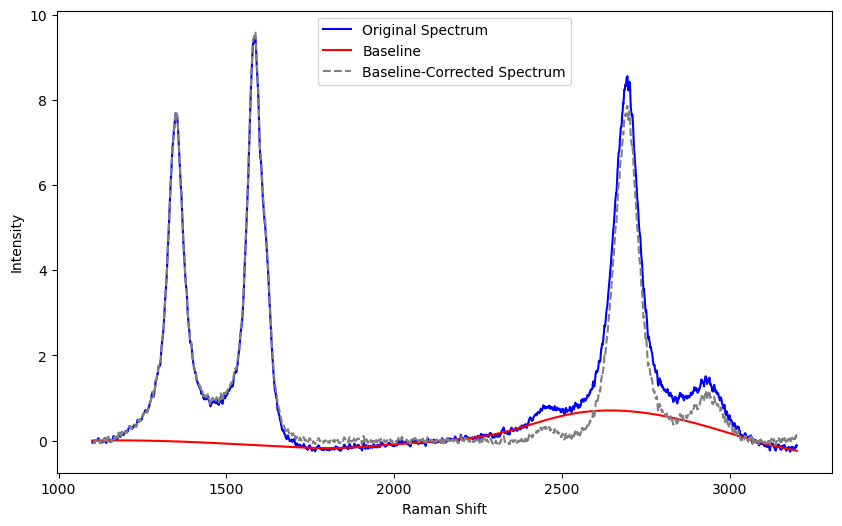

In [148]:
from pybaselines import Baseline

# Initialize the Baseline class
baseline_obj = Baseline()

# Apply asls baseline correction
# Parameters: `lam` controls smoothness, and `p` controls asymmetry
baseline, params = baseline_obj.arpls(y, lam=1e7)

# Subtract the baseline from the original data
corrected_y = y - baseline

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Spectrum', color='blue')
plt.plot(x, baseline, label='Baseline', color='red')
plt.plot(x, corrected_y, label='Baseline-Corrected Spectrum', color='gray', linestyle='--')
plt.xlabel("Raman Shift")
plt.ylabel("Intensity")
plt.legend()
plt.show()